# For Exercises 14–20, work with the adult_ch6_training and adult_ch6_test data sets. Use either Python or R to solve each problem.

In [29]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.tools.tools as stattools
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [30]:
# Importing Datasets
adult_train = pd.read_csv("/Users/datascience/Desktop/ADS 502 Data Sets/Website Data Sets/adult_ch6_training.csv")
adult_test = pd.read_csv("/Users/datascience/Desktop/ADS 502 Data Sets/Website Data Sets/adult_ch6_test.csv")

## 14. Create a CART model using the training data set that predicts income using marital status and capital gains and losses. Visualize the decision tree (that is, provide the decision tree output). Describe the first few splits in the decision tree.

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

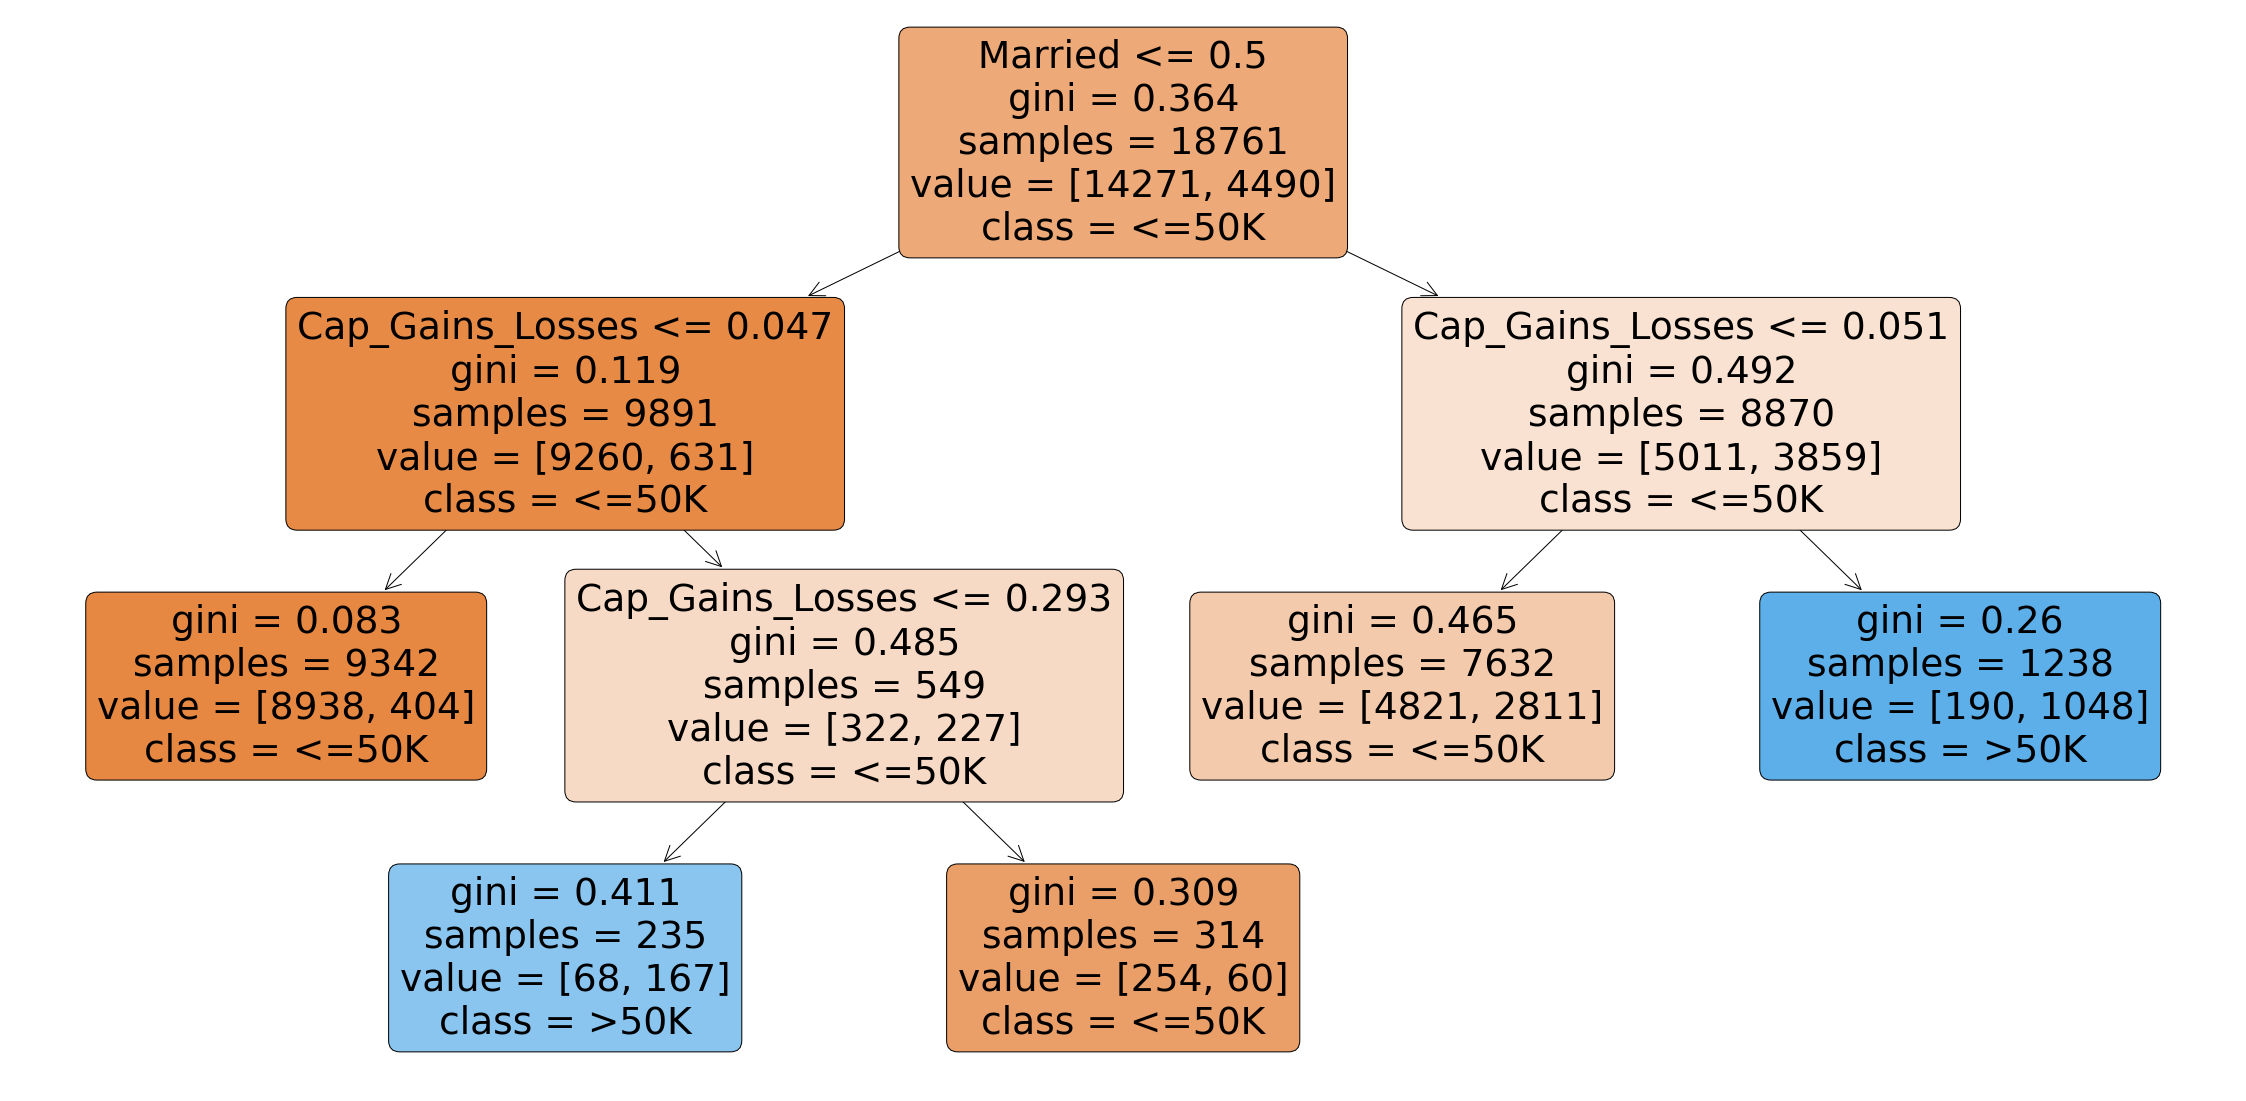

In [31]:
y = adult_train[['Income']]
X = adult_train[['Marital status', 'Cap_Gains_Losses']]

# Convert categorical variable into a dummy variable form
mar_dummy = pd.get_dummies(X['Marital status'])

#Add dummy variables back into X variables
X = pd.concat((X[['Cap_Gains_Losses']], mar_dummy), axis = 1) #Column-wise Concatation (axis=1)

# CART alogrithn (criterion = gini)
cart = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=5).fit(X, y)

# Tree Structure
plt.figure(figsize=(40,20))
plot_tree(cart,
          feature_names = X.columns,
          class_names=y['Income'].unique(),
          filled=True,
          rounded = True)

# Predict Income using Cart
CartPredIncome = cart.predict(X)
CartPredIncome

The root node is located at the top of the decision tree diagram. Starting at the root node, variables are tested at the decision node with each possible outcome in a branch. Then each branch leads to another decision node or to a terminating lead node. If the sample satisfies the condition, then it goes to the left branch (if it exists) and if its false it will go to the right. Furthermore, the value in each box tells us how many samples at the node fall into each category. To predict the outcome for a new data point, you should predict the category with the highest value since its the most common category for samples at that node. Moreover, in the visualization, the root node tells us that 36.4% of the records in the dataset have low income (<=50k). At a root node split, CART identifies the most efficacious possible binary split as seperating the records into two groups. The root node splits depending on the marital status (married versus not married). At the married node, it makes a second split based on the capital gains/losses. 

## 15. Develop a CART model using the test data set that utilizes the same target and predictor variables. Visualize the decision tree. Compare the decision trees. Does the test data result match the training data result?

array(['<=50K', '>50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

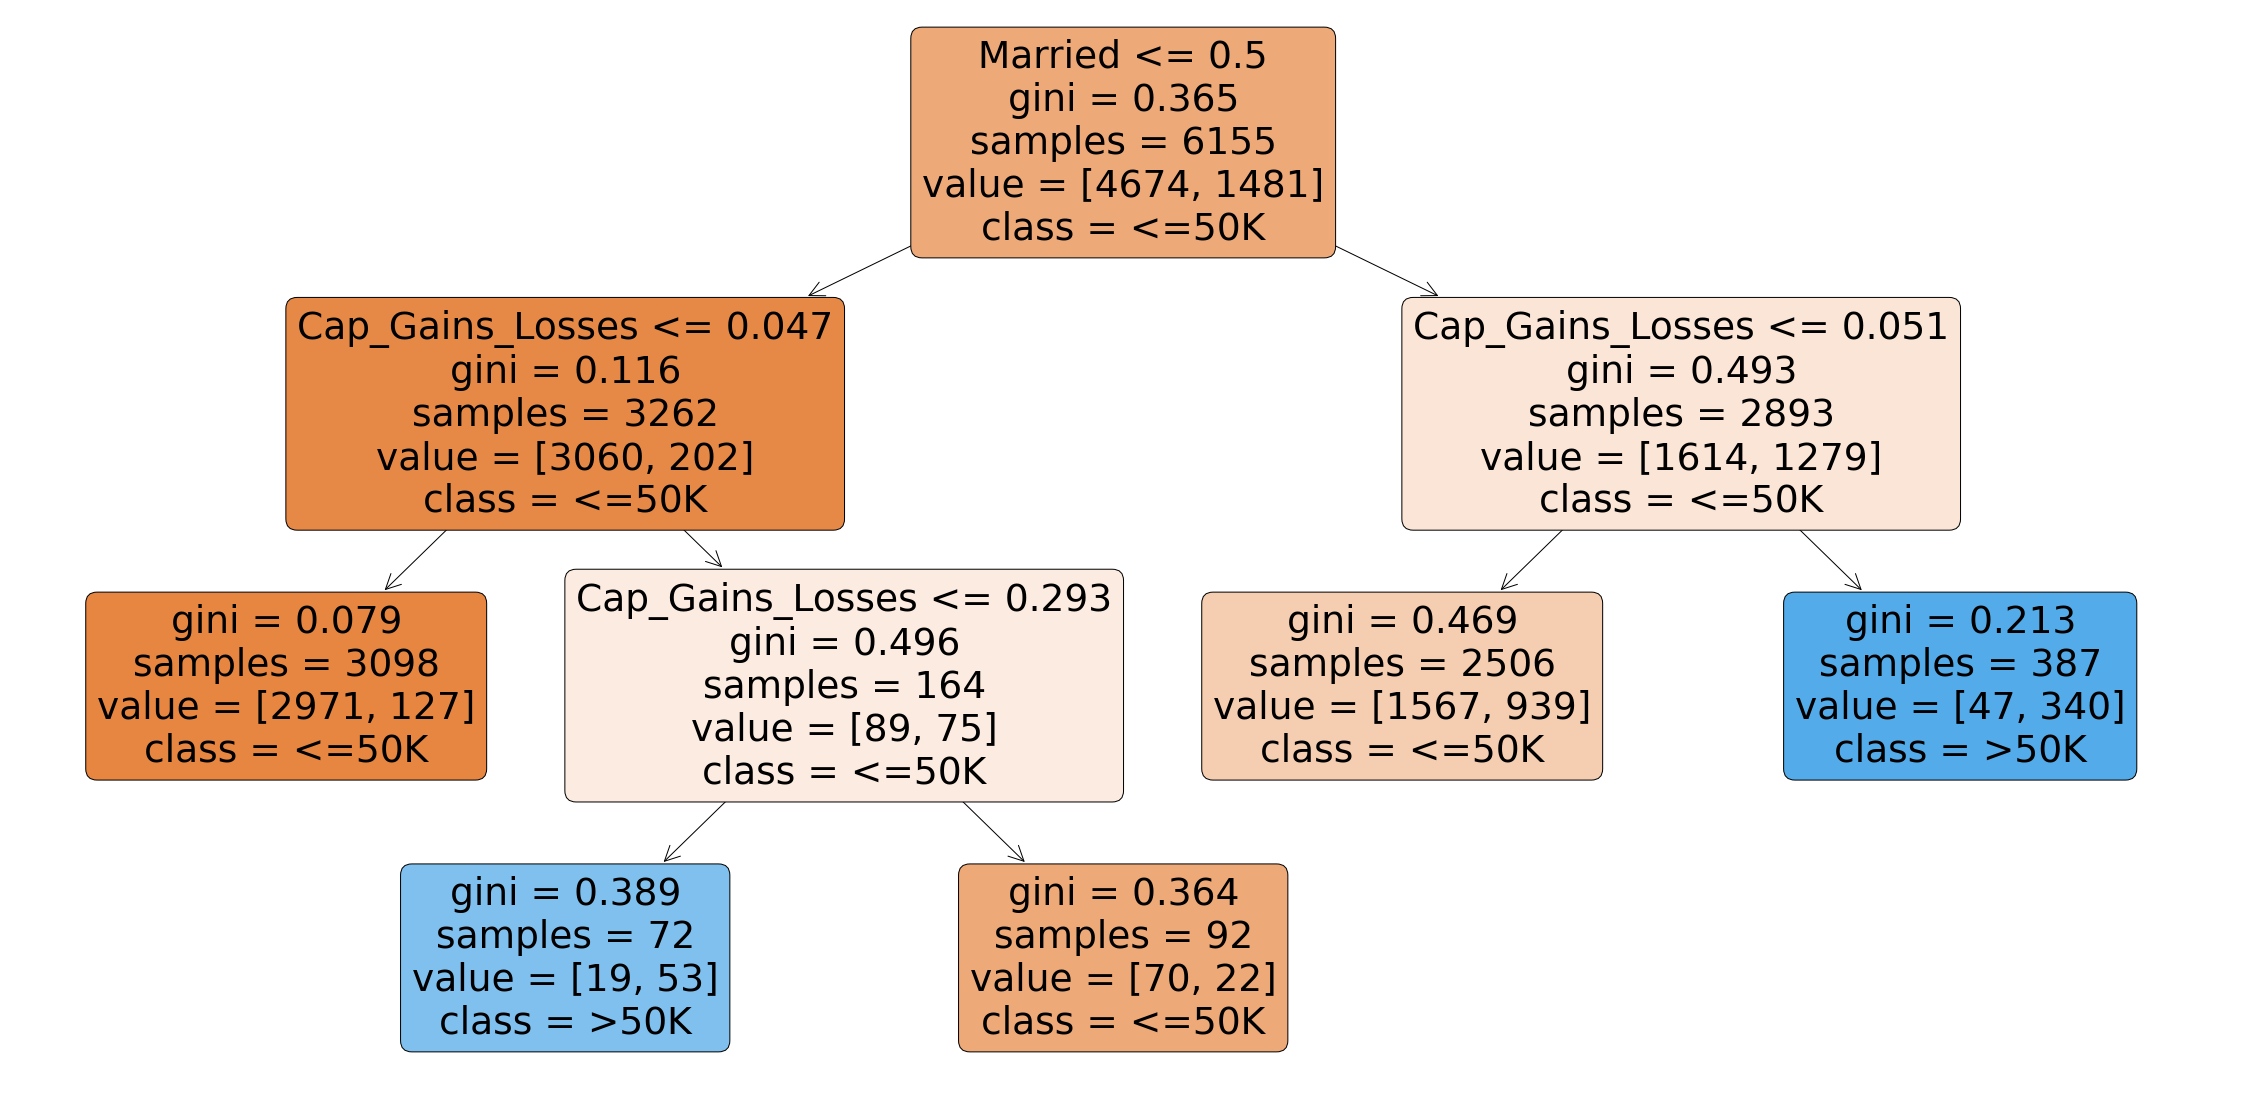

In [32]:
# Repeat but with testing data

y_t = adult_test[['Income']]
X_t = adult_test[['Marital status', 'Cap_Gains_Losses']]

# Convert categorical variable into a dummy variable form
mar_dummy_t = pd.get_dummies(X_t['Marital status'])

#Add dummy variables back into X variables
X_t = pd.concat((X_t[['Cap_Gains_Losses']], mar_dummy_t), axis = 1) #Column-wise Concatation (axis=1)

# CART alogrithn (criterion = gini)
cart_t = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=5).fit(X_t, y_t)

# Tree Structure
plt.figure(figsize=(40,20))
plot_tree(cart_t,
          feature_names = X_t.columns,
          class_names=y_t['Income'].unique(),
          filled=True,
          rounded = True)

# Predict Income using Cart
CartPredIncome_t = cart.predict(X_t)
CartPredIncome_t

The training and testing data are mostly similar but with a small differences among each numerical value shown. For example, comparing the root nodes, the test root node tells us that 36.5% of the records in the dataset have low income while the training set tells us that 36.4$ of the records in the dataset have low income. 

## 16. Use the training data set to build a C5.0 model to predict income using marital status and capital gains and losses. Specify a minimum of 75 cases per terminal node. Visualize the decision tree. Describe the first few splits in the decision tree.

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

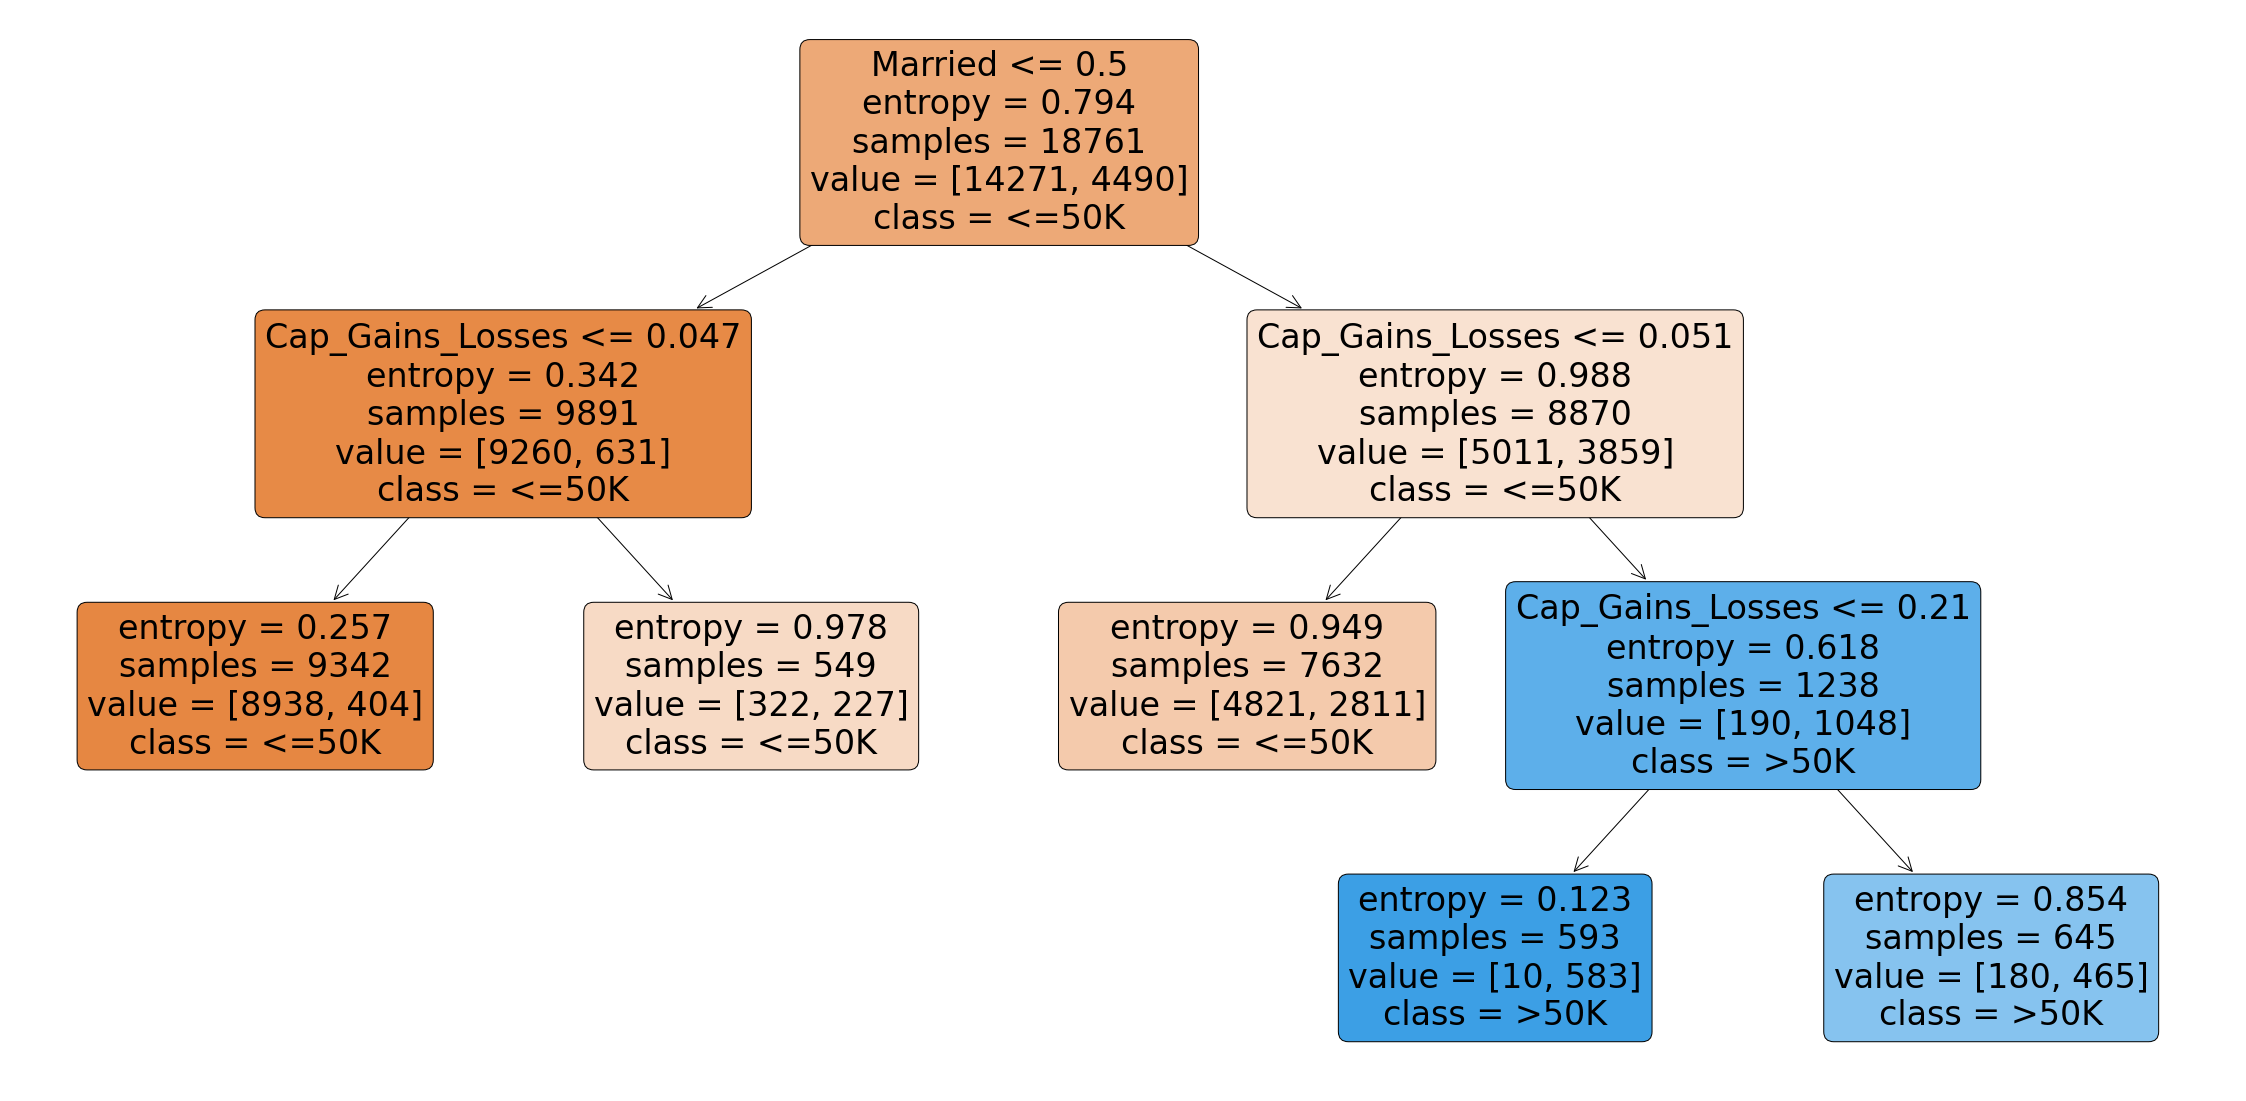

In [33]:
# Use C5.0 model on training set (criterion = 'entropy')
c5 = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5, min_samples_leaf=75).fit(X, y)

# Tree Structure
plt.figure(figsize=(40,20))
plot_tree(c5,
          feature_names = X.columns,
          class_names=y['Income'].unique(),
          filled=True,
          rounded = True)

# Predict Income using C5.0 model
C5PredIncome = c5.predict(X)
C5PredIncome


The root node for the C5.0 model is the Marital status. Then the node is split depnding on the Capital Gains and Losses value. 

## 17. How does your C5.0 model compare to the CART model? Describe the similarities and differences.

Both models use the name number of nodes and splits in decision tree. However, where it splits is different between the two. Both models split the root node with the same number of samples along with each internal nodes second split. Toward the leaf nodes is where we see a difference in sample sizes.